# Jupyter Tips

- There are two modes: command mode and edit mode. The edit mode is entered when you click in a cell to edit it. You can leave it with "Esc". The command mode allows:
    - "h": Help
    - "b": Creating a cell
    - "m": Switch cell type to Markdown
    - "y": Switch cell type to Code
    - "Ctrl+Enter": Run selected cell(s)
    - "d": Delete a cell

You can use "!" to execute **bash commands**:

In [ ]:
!ls

With this, you can for example install missing modules with pip:

(This one installs the jupyter nb extensions)

In [ ]:
#!pip install jupyter_contrib_nbextensions

You can even use **Interactive Widgets**:

In [ ]:
import ipywidgets as widgets
from IPython.display import display

slider = widgets.IntSlider(min=0, max=10, step=1, value=5)
display(slider)


In [ ]:
%%time
print('With %%time, you can get run time statistics')
sum(range(1000))
print('With %%timeit, you can automatically run multiple times to get a more reliable result (see below).')

In [ ]:
%%time
sum(range(1000))

In [ ]:
%%timeit
sum(range(1000))

------------------

# Part I: The Python Syntax
Below, a short example is provided that includes most of the most common python syntax.

In [ ]:
# --- Import Modules ---
import math

# --- Variables ---
x = 42                  # int
y = math.sqrt(math.pi)  # float
name = "Alice"          # str
is_active = True        # bool
nothing = None          # Nonetype

# --- Mutable vs immutable ---
nums = [1, 2, 3]        # list (mutable)
text = "hello"          # string (immutable)
nums.append(4)
# text[0] = 'H'         # would fail: strings are immutable!

# --- Dictionaries ---
ages = {"Alice": 30, "Bob": 25}
for key, value in ages.items():
    print(f"{key} is {value}")

# --- Control flow ---
if x < y:
    print("pi is large enough")
elif y == 42:
    print("pi is exactly 3?")
else:
    print("impossible")

# --- Exception handling ---
try:
    result = 10 / 0
except ZeroDivisionError as e:
    print("Oops:", e)
    
# --- Loops ---
for n in nums:
    print(n, end=" ")
print()

count = 0
while count < 3:
    print("count:", count)
    count += 1

# --- Functions ---
def greet(person, loud=False):
    """Say hello to a person."""
    msg = f"Hello, {person}!"
    return msg.upper() if loud else msg

print(greet(name))
print(greet("Bob", loud=True))


# --- Classes and objects ---
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def birthday(self):
        print(f'Happy birthday, {self.name}!')  # f-strings allow the direct input of variables
        self.age += 1

    def __str__(self):
        return f"{self.name}, {self.age} years old"

# --- Read user input ---
name, age = input('Enter your name and age (separated by a space): ').split()  # Split is a built-in function of "string" which creates a list of the two inputs, which are then unpacked two to variables
age = int(age)  # Convert the age from string to integer

p = Person(name, age)  # On object construction, the __init__ is called
print(p)  # print calls the string representations __str__ of our object p
p.birthday()  # Call the "birthday" member function
print(p)

## A very special example

In [3]:
a = 0.1 + 0.2
a

0.30000000000000004

In [1]:
a = 0.1 + 0.2
if a == 0.3:
    print('Can you explain, why this is not printed?')
else:
    print('There seems to be something wrong?!')

There seems to be something wrong?!


In [5]:
from solutions import solution0
print(solution0)

The result isn't exactly 0.3 because of precision limitations in binary floating-point representation.
 Internally, 0.1 and 0.2 can't be represented exactly as binary fractions, so their sum ends up being a number very close to 0.3, but not exactly 0.3.
 As a result, the condition a == 0.3 evaluates to False, triggering the else statement. => In general applies: avoid comparisons with floats!


In [4]:
# A common workaround
a = 0.1 + 0.2
if abs(a - 0.3) < 1e-9:
    print('This works now!')
else:
    print('Something still seems off.')

This works now!


# Part II: The Zen of Python

The Zen of Python is summing up the principles of Python programming.
It is part of the language and can be accessed with:

In [6]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Python is Full of Easter-Eggs

In [7]:
from __future__ import braces

SyntaxError: not a chance (3905450354.py, line 1)

## Implicit vs Explicit 
When writing Python code, implicit concepts like chanining and list comprehensions can be very helpful and reduce repetitions.
However, readibility suffers a lot, why it is **not** recommended for beginners.

In [ ]:
def process(value):
    print(f"Processing {value}")
    return value.upper()

ready = True
data = "apple"
default = "banana"

# --- Implicit and complex ---
result = process(data or default) if ready else None
print("Implicit: ", result)

# --- Explicit and simple ---
if ready:
    if data:
        result = process(data)
    else:
        result = process(default)
else:
    result = None
print("Explicit: ", result)

---------------------

# Where Python Shines
One of the biggest advantages is Python's simplicity and usability.
Coding in Python is very convenient and rather easy.
And thanks to many available packages, Python can easily be used for many different purposes.

### Packages

#### Statistics with NumPy

In [8]:
# Simple statistical analysis with NumPy

import numpy as np

# Generate random data (e.g. 10000 samples from a normal distribution)
data = np.random.randn(10000)

# Compute basic statistics
mean = np.mean(data)
median = np.median(data)
variance = np.var(data)
std_dev = np.std(data)
min_val = np.min(data)
max_val = np.max(data)

# Print results
print(f"Mean:      {mean:.3f}")
print(f"Median:    {median:.3f}")
print(f"Variance:  {variance:.3f}")
print(f"Std dev:   {std_dev:.3f}")
print(f"Min:       {min_val:.3f}")
print(f"Max:       {max_val:.3f}")

Mean:      -0.002
Median:    0.005
Variance:  0.993
Std dev:   0.996
Min:       -3.941
Max:       3.965


#### scikit-learn (Fast)
This code loads the scikit-learn digits dataset (a smaller, built-in version of MNIST with 8×8 grayscale images of handwritten digits).
It trains a multi-layer perceptron with one hidden layer of 50 neurons to classify digits 0–9.

After training, it reports the accuracy and shows a few example predictions — true vs. predicted labels — illustrating how neural networks can learn visual patterns directly from pixel intensities.

Accuracy: 0.975925925925926

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       1.00      0.98      0.99        52
           2       0.98      0.94      0.96        53
           3       1.00      0.98      0.99        54
           4       0.98      1.00      0.99        48
           5       0.95      0.96      0.96        57
           6       0.97      0.98      0.98        60
           7       0.98      1.00      0.99        53
           8       1.00      0.95      0.97        61
           9       0.95      0.98      0.97        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



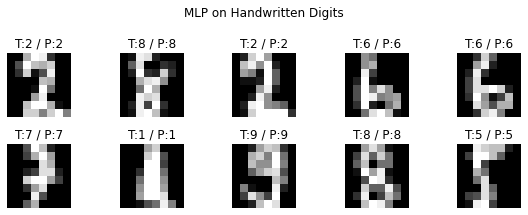

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- Load dataset ---
digits = load_digits()
X = digits.data        # each sample: 8x8 image flattened to 64 features
y = digits.target

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# --- Define and train MLP ---
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=0)
mlp.fit(X_train, y_train)

# --- Evaluate ---
print("Accuracy:", mlp.score(X_test, y_test))
print("\nClassification report:\n", classification_report(y_test, mlp.predict(X_test)))

# --- Visualize some predictions ---
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for ax, image, label, pred in zip(axes.ravel(), X_test, y_test, mlp.predict(X_test)):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f"T:{label} / P:{pred}")
    ax.axis('off')
plt.suptitle("MLP on Handwritten Digits")
plt.tight_layout()
plt.show()


#### scikit-learn (Full Dataset)
This example uses the real MNIST dataset of 70,000 handwritten digits (0–9).
Each 28×28 image is flattened into a 784-dimensional vector and normalized for training.

A simple MLP with one hidden layer of 100 neurons learns to recognize digits via backpropagation with ReLu as activation function.
After training for a few iterations, it can already reach ~97–98% accuracy, and the plotted examples show how the network correctly identifies most digits.

2025-10-16 10:55:09.722429: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Iteration 1, loss = 0.42681977
Iteration 2, loss = 0.20010163
Iteration 3, loss = 0.15163435
Iteration 4, loss = 0.12362005
Iteration 5, loss = 0.10169952
Iteration 6, loss = 0.08724390
Iteration 7, loss = 0.07461164
Iteration 8, loss = 0.06508361
Iteration 9, loss = 0.05654229
Iteration 10, loss = 0.05036858


/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9751


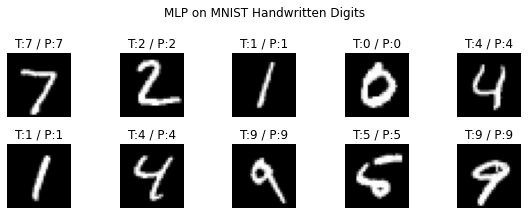

In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Load and preprocess data ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train), -1) / 255.0  # flatten and normalize
X_test  = X_test.reshape(len(X_test), -1) / 255.0

# --- Define and train MLP ---
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=10, random_state=0, verbose=True)
mlp.fit(X_train, y_train)

# --- Evaluate ---
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# --- Visualize a few predictions ---
fig, axes = plt.subplots(2, 5, figsize=(8, 3))
for ax, img, true, pred in zip(axes.ravel(), X_test[:10], y_test[:10], y_pred[:10]):
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"T:{true} / P:{pred}")
    ax.axis("off")
plt.suptitle("MLP on MNIST Handwritten Digits")
plt.tight_layout()
plt.show()


#### Pandas
This example simulates a detector calibration study, a common task in experimental particle physics.
We generate a series of “true” particle energies and simulate what a detector might measure.

The real-world measurement is slightly biased and noisy due to imperfect calibration and random fluctuations.
By storing the data in a pandas DataFrame, we can quickly compute key statistics and the correlation between true and measured energy with essentially 2 lines of code.

The resulting scatter plot, together with the ideal calibration line, clearly shows the detector’s linear response and small deviations.

           true_E      meas_E    residual
count  500.000000  500.000000  500.000000
mean   105.000000   99.623228   -5.376772
std     55.013123   52.187299    5.852413
min     10.000000    3.969520  -23.011562
25%     57.500000   56.296867   -9.247447
50%    105.000000   98.066237   -5.671734
75%    152.500000  143.184846   -1.306977
max    200.000000  201.672503   10.647352

Correlation coefficient: 0.995


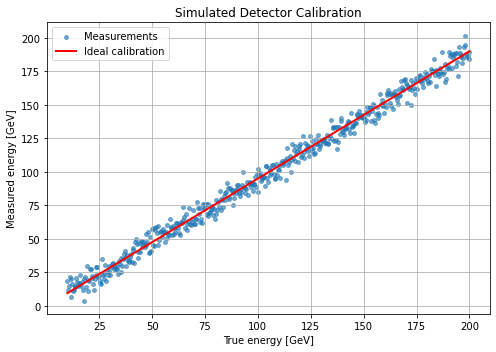

In [11]:
# Physics-motivated pandas example: detector calibration curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Simulate detector data ---
np.random.seed(0)
N = 500
true_E = np.linspace(10, 200, N)  # true particle energy [GeV]
meas_E = 0.95 * true_E + np.random.normal(0, 5, N)  # measured energy with bias + noise

# --- Store in DataFrame ---
df = pd.DataFrame({"true_E": true_E, "meas_E": meas_E})
df["residual"] = df["meas_E"] - df["true_E"]

# --- Compute summary statistics ---
print(df.describe())

# --- Compute correlation ---
corr = df["true_E"].corr(df["meas_E"])
print(f"\nCorrelation coefficient: {corr:.3f}")

# --- Plot calibration curve ---
plt.figure(figsize=(7,5))
plt.scatter(df["true_E"], df["meas_E"], alpha=0.6, s=15, label="Measurements")
plt.plot(df["true_E"], 0.95 * df["true_E"], color="red", lw=2, label="Ideal calibration")
plt.xlabel("True energy [GeV]")
plt.ylabel("Measured energy [GeV]")
plt.title("Simulated Detector Calibration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Plotting
One of Python's greates strenghts!
The first example simulates a detector-like measurement common in experimental physics.
It randomly generates 5,000 “hits” in pseudorapidity (η) and azimuthal angle (φ).

A 2D histogram is created to represent hit density across this η–φ plane, and visualized as a heatmap using Matplotlib.
Contours and annotations highlight regions of higher activity (“hot spots”).

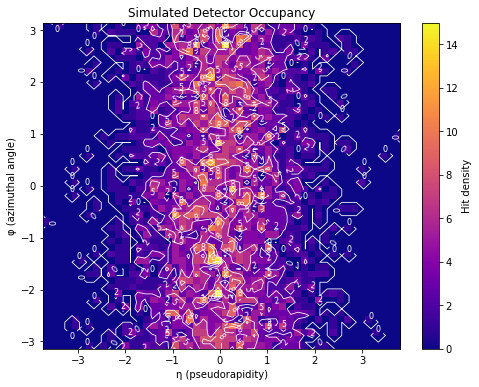

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulated detector hits in eta-phi space ---
np.random.seed(0)
eta = np.random.normal(0, 1.0, 5000)     # pseudorapidity
phi = np.random.uniform(-np.pi, np.pi, 5000)  # azimuthal angle

# --- Build 2D histogram (detector occupancy) ---
bins = [50, 50]
H, eta_edges, phi_edges = np.histogram2d(eta, phi, bins=bins)

# --- Plot heatmap ---
plt.figure(figsize=(8, 6))
im = plt.imshow(
    H.T, origin='lower',
    extent=[eta_edges[0], eta_edges[-1], phi_edges[0], phi_edges[-1]],
    aspect='auto', cmap='plasma'
)

# --- Add contours, colorbar, labels ---
contours = plt.contour(
    H.T, levels=5, colors='white', linewidths=0.8,
    extent=[eta_edges[0], eta_edges[-1], phi_edges[0], phi_edges[-1]]
)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

plt.colorbar(im, label='Hit density')
plt.xlabel('η (pseudorapidity)')
plt.ylabel('φ (azimuthal angle)')
plt.title('Simulated Detector Occupancy')

plt.show()

The second example plots a 3D Gaussian potential field with a contur projection and a color coding of the field strength.

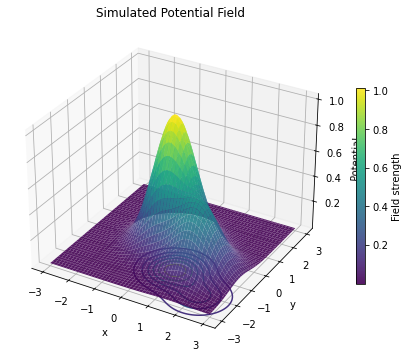

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

# --- Simulate a 2D Gaussian potential field ---
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)) + 0.5 * np.exp(-((X - 1.5)**2 + (Y + 1)**2))

# --- Create 3D surface plot ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.contour(X, Y, Z, zdir='z', offset=-0.2, cmap='viridis')  # contour projection

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')
ax.set_title('Simulated Potential Field')

fig.colorbar(surf, shrink=0.6, label='Field strength')

plt.show()